In [1]:
import numpy
import netCDF4
import matplotlib
import matplotlib.pyplot as mp
import datetime
import matplotlib.colors
import scipy.stats

import matplotlib.ticker
import cartopy.mpl.gridliner #import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import mpl_toolkits
import cartopy

DEGREE_SIGN = u'\u00B0'
mp.rcParams.update({'mathtext.default': 'regular'})

% matplotlib inline

In [2]:
run_info = 'FMAASO'
skip_time=0

# GEO EM FILE

In [3]:
geo_em_ncfile = netCDF4.Dataset('/Users/baird/Dropbox/_data_WRF/geo_em.d01_amazon_50km.nc')
HGT_M = geo_em_ncfile.variables['HGT_M'][0,:,:]

# time, LAT, LON ncfiles

In [4]:
xlat_ncfile_name = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/FMAASO/1000/concat_nc_files/wrfout_d01_1979-01-01_00:00:00_XLAT.nc'
xlong_ncfile_name = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/FMAASO/1000/concat_nc_files/wrfout_d01_1979-01-01_00:00:00_XLONG.nc'
landmask_ncfile_name = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/FMAASO/1000/concat_nc_files/wrfout_d01_1979-01-01_00:00:00_LANDMASK.nc'
times_ncfile_name = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/FMAASO/1000/concat_nc_files/wrfout_d01_1979-01-01_00:00:00_1979-01-11_00:00:00_Times_ens_mean.nc'

# import FMAASO 400 data

In [103]:
data_dir = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/FMAASO/400/concat_nc_files/'
filename_prefix = 'wrfout_d01_1979-01-01_00:00:00_1979-01-11_00:00:00_'
filename_suffix = '_ens_mean.nc'

time_ncfile = netCDF4.Dataset(times_ncfile_name)
xlat_ncfile = netCDF4.Dataset(xlat_ncfile_name)
xlong_ncfile = netCDF4.Dataset(xlong_ncfile_name)
landmask_ncfile = netCDF4.Dataset(landmask_ncfile_name)

lh_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'LH' + filename_suffix)
rainc_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'RAINC' + filename_suffix)
rainnc_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'RAINNC' + filename_suffix)
t2_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'T2' + filename_suffix)
qfx_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'QFX' + filename_suffix)

ecan_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'ECAN' + filename_suffix)
edir_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'EDIR' + filename_suffix)
etran_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'ETRAN' + filename_suffix)

qvapor_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'QVAPOR' + '_ens_mean_vinterp_zcoords.nc')
u_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'U' + '_ens_mean_vinterp_zcoords.nc')
v_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'V' + '_ens_mean_vinterp_zcoords.nc')
w_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'W' + '_ens_mean_vinterp_zcoords.nc')

u_ncfile_pressure = netCDF4.Dataset(data_dir + filename_prefix + 'U' + '_ens_mean_vinterp.nc')
v_ncfile_pressure = netCDF4.Dataset(data_dir + filename_prefix + 'V' + '_ens_mean_vinterp.nc')

In [6]:
time_var = time_ncfile.variables['Times']
time = time_ncfile.variables['Times'][:]
xlat = xlat_ncfile.variables['XLAT'][0,:,:]
xlong = xlong_ncfile.variables['XLONG'][0,:,:]
landmask = landmask_ncfile.variables['LANDMASK'][0,:,:]

#lh_400 = lh_ncfile.variables['LH'][:]
rainc_400 = rainc_ncfile.variables['RAINC'][:]
rainnc_400 = rainnc_ncfile.variables['RAINNC'][:]
#qfx_400 = qfx_ncfile.variables['QFX'][:]*86400.
#t2_400 = t2_ncfile.variables['T2'][:]

#ecan_400 = ecan_ncfile.variables['ECAN'][:]*86400.
#edir_400 = edir_ncfile.variables['EDIR'][:]*86400.
#etran_400 = etran_ncfile.variables['ETRAN'][:]*86400.

#plev = qvapor_ncfile.variables['plev'][:]
z = qvapor_ncfile.variables['z'][:]
qvapor_400 = qvapor_ncfile.variables['QVAPOR'][:]
w_400 = w_ncfile.variables['W'][:]

In [127]:
u_400_850 = u_ncfile_pressure.variables['U'][:,0:4,:,:]
v_400_850 = v_ncfile_pressure.variables['V'][:,0:4,:,:]

In [128]:
u_400_850 = numpy.nanmean(u_400_850, axis=1)
v_400_850 = numpy.nanmean(v_400_850, axis=1)

# import FMAASO 1000 data

In [105]:
data_dir = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/FMAASO/1000/concat_nc_files/'
filename_prefix = 'wrfout_d01_1979-01-01_00:00:00_1979-01-11_00:00:00_'
filename_suffix = '_ens_mean.nc'

time_ncfile = netCDF4.Dataset(times_ncfile_name)
xlat_ncfile = netCDF4.Dataset(xlat_ncfile_name)
xlong_ncfile = netCDF4.Dataset(xlong_ncfile_name)
landmask_ncfile = netCDF4.Dataset(landmask_ncfile_name)

lh_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'LH' + filename_suffix)
rainc_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'RAINC' + filename_suffix)
rainnc_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'RAINNC' + filename_suffix)
t2_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'T2' + filename_suffix)
qfx_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'QFX' + filename_suffix)

ecan_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'ECAN' + filename_suffix)
edir_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'EDIR' + filename_suffix)
etran_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'ETRAN' + filename_suffix)

qvapor_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'QVAPOR' + '_ens_mean_vinterp_zcoords.nc')
u_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'U' + '_ens_mean_vinterp_zcoords.nc')
v_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'V' + '_ens_mean_vinterp_zcoords.nc')
w_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'W' + '_ens_mean_vinterp_zcoords.nc')

u_ncfile_pressure = netCDF4.Dataset(data_dir + filename_prefix + 'U' + '_ens_mean_vinterp.nc')
v_ncfile_pressure = netCDF4.Dataset(data_dir + filename_prefix + 'V' + '_ens_mean_vinterp.nc')

In [79]:
time_var_1000 = time_ncfile.variables['Times']
time_1000 = time_ncfile.variables['Times'][:]
xlat = xlat_ncfile.variables['XLAT'][0,:,:]
xlong = xlong_ncfile.variables['XLONG'][0,:,:]
landmask = landmask_ncfile.variables['LANDMASK'][0,:,:]

#lh_1000 = lh_ncfile.variables['LH'][:]
rainc_1000 = rainc_ncfile.variables['RAINC'][:]
rainnc_1000 = rainnc_ncfile.variables['RAINNC'][:]
#qfx_1000 = qfx_ncfile.variables['QFX'][:]*86400.
#t2_1000 = t2_ncfile.variables['T2'][:]

#ecan_1000 = ecan_ncfile.variables['ECAN'][:]*86400.
#edir_1000 = edir_ncfile.variables['EDIR'][:]*86400.
#etran_1000 = etran_ncfile.variables['ETRAN'][:]*86400.

qvapor_1000 = qvapor_ncfile.variables['QVAPOR'][:]
w_1000 = w_ncfile.variables['W'][:]

In [106]:
u_1000_850 = u_ncfile_pressure.variables['U'][:,3,:,:]
v_1000_850 = v_ncfile_pressure.variables['V'][:,3,:,:]

# get time stamps

In [9]:
time_datetimes = numpy.zeros(time.shape[0], dtype=object)
for t in range(time.shape[0]):
    time_string = ''.join([i.decode('utf-8') for i in time[t,:]])
    year,month,day = time_string.split('_')[0].split('-')
    hour,minute,second = time_string.split('_')[1].split(':')
    time_datetimes[t] = datetime.datetime(int(year),int(month),int(day),int(hour),int(second),int(minute))

# RAINC differences

In [10]:
rainc_400_diff = numpy.zeros((rainc_400.shape))*numpy.nan
rainc_400_diff[:-1,:,:] = numpy.diff(rainc_400, axis=0)#*(24./3) # convert to mm/day

rainc_1000_diff = numpy.zeros((rainc_1000.shape))*numpy.nan
rainc_1000_diff[:-1,:,:] = numpy.diff(rainc_1000, axis=0)#*(24./3) # convert to mm/day

# RAINNC differences

In [11]:
rainnc_400_diff = numpy.zeros((rainnc_400.shape))*numpy.nan
rainnc_400_diff[:-1,:,:] = numpy.diff(rainnc_400, axis=0)#*(24.) # convert to mm/day

rainnc_1000_diff = numpy.zeros((rainnc_1000.shape))*numpy.nan
rainnc_1000_diff[:-1,:,:] = numpy.diff(rainnc_1000, axis=0)#*(24.) # convert to mm/day

# RAINTOT differences

In [12]:
raintot_400 = rainc_400+rainnc_400
raintot_1000 = rainc_1000+rainnc_1000

In [13]:
raintot_400_diff = numpy.zeros((raintot_400.shape))*numpy.nan
raintot_400_diff[:-1,:,:] = numpy.diff(raintot_400, axis=0)

raintot_1000_diff = numpy.zeros((raintot_1000.shape))*numpy.nan
raintot_1000_diff[:-1,:,:] = numpy.diff(raintot_1000, axis=0)

raintot_hourly_diffs = raintot_1000_diff - raintot_400_diff

# QVAPOR differences

In [14]:
qvapor_diffs = qvapor_1000-qvapor_400

In [15]:
qvapor_diffs.shape

(241, 26, 179, 289)

In [16]:
w_diffs = w_1000-w_400

# QVAPOR lat means

In [17]:
lat_hi = 10.
lat_lo = -10.

In [18]:
qvapor_diffs.shape
qvapor_diffs_landmask = numpy.copy(qvapor_diffs)
qvapor_diffs_landmask[:,:,landmask==1]=numpy.nan
qvapor_diffs_landmask[qvapor_diffs_landmask==9.96921e36]=numpy.nan

In [19]:
# subset between lat_hi and lat_lo
lat_indices = (xlat<=lat_hi)&(xlat>=lat_lo)
qvapor_diffs_lat_subset = qvapor_diffs[:,:,lat_indices[:,0],:]

# HGT_M subset

In [20]:
round(HGT_M.shape[0]/2)

90

In [21]:
HGT_M_lat_subset = HGT_M[lat_indices[:,0],:]
HGT_M_lat_subset_maxvals = numpy.max(HGT_M_lat_subset, axis=0)
HGT_M_lat_subset_equator = HGT_M[round(HGT_M_lat_subset.shape[0]/2),:]
HGT_M_lat_subset_minvals = numpy.min(HGT_M_lat_subset, axis=0)
HGT_M_lat_subset_mean = numpy.mean(HGT_M_lat_subset, axis=0)
HGT_M_lat_subset_median = numpy.median(HGT_M_lat_subset, axis=0)

In [22]:
qvapor_diffs_lat_mean = numpy.nanmean(qvapor_diffs_lat_subset, axis=2)

In [23]:
day00hour13 = [t.day==1 and t.hour==14 for t in time_datetimes]
day00hour14 = [t.day==1 and t.hour==14 for t in time_datetimes]
day00hour15 = [t.day==1 and t.hour==15 for t in time_datetimes]
day00hour18 = [t.day==1 and t.hour==18 for t in time_datetimes]
day00hour19 = [t.day==1 and t.hour==19 for t in time_datetimes]
day00hour20 = [t.day==1 and t.hour==20 for t in time_datetimes]
day00hour21 = [t.day==1 and t.hour==21 for t in time_datetimes]

In [24]:
raintot_hourly_diffs_d00h13 = raintot_hourly_diffs[day00hour14,:,:].squeeze()
raintot_hourly_diffs_d00h14 = raintot_hourly_diffs[day00hour14,:,:].squeeze()
raintot_hourly_diffs_d00h15 = raintot_hourly_diffs[day00hour15,:,:].squeeze()
raintot_hourly_diffs_d00h18 = raintot_hourly_diffs[day00hour18,:,:].squeeze()
raintot_hourly_diffs_d00h19 = raintot_hourly_diffs[day00hour19,:,:].squeeze()
raintot_hourly_diffs_d00h20 = raintot_hourly_diffs[day00hour20,:,:].squeeze()
raintot_hourly_diffs_d00h21 = raintot_hourly_diffs[day00hour21,:,:].squeeze()

qvapor_hourly_diffs_d00h13 = qvapor_diffs_lat_mean[day00hour14,:,:].squeeze()
qvapor_hourly_diffs_d00h14 = qvapor_diffs_lat_mean[day00hour14,:,:].squeeze()
qvapor_hourly_diffs_d00h15 = qvapor_diffs_lat_mean[day00hour15,:,:].squeeze()
qvapor_hourly_diffs_d00h18 = qvapor_diffs_lat_mean[day00hour18,:,:].squeeze()
qvapor_hourly_diffs_d00h19 = qvapor_diffs_lat_mean[day00hour19,:,:].squeeze()
qvapor_hourly_diffs_d00h20 = qvapor_diffs_lat_mean[day00hour20,:,:].squeeze()
qvapor_hourly_diffs_d00h21 = qvapor_diffs_lat_mean[day00hour21,:,:].squeeze()

In [25]:
qvapor_hourly_diffs_d00h18.shape

(26, 289)

# SET UP PLOT

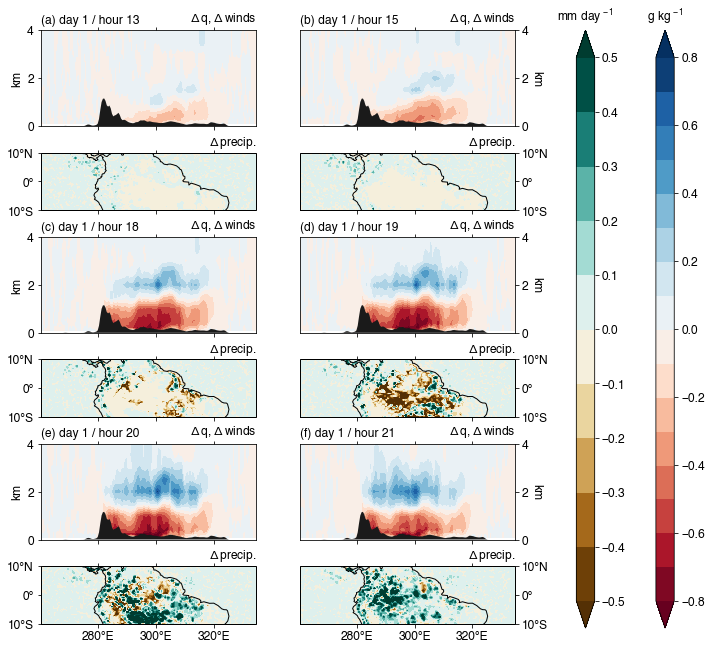

In [346]:
fontsize = 12

fig = mp.figure(figsize=(8.5,11))

# outer_grid = matplotlib.gridspec.GridSpec(2, 2, wspace=0.0, hspace=0.0)
# inner_grid = matplotlib.gridspec.GridSpecFromSubplotSpec(3,1, subplot_spec=outer_grid[0], wspace=0.0, hspace=0.0)

# ax11 = mp.Subplot(fig, inner_grid[0:2,:])
# fig.add_subplot(ax11)
# ax21 = mp.Subplot(fig, inner_grid[2,:])
# fig.add_subplot(ax21, projection=cartopy.crs.PlateCarree())

gs = matplotlib.gridspec.GridSpec(21,2,hspace=3)#, wspace=0.2, hspace=0.1)

ax11 = mp.subplot(gs[0:4,0])
ax21 = mp.subplot(gs[4:7,0], projection=cartopy.crs.PlateCarree())
ax21.set_extent([xlong.min()+55., xlong.max(), lat_lo, lat_hi], crs=cartopy.crs.PlateCarree())

ax31 = mp.subplot(gs[7:11,0])
ax41 = mp.subplot(gs[11:14,0], projection=cartopy.crs.PlateCarree())
ax41.set_extent([xlong.min()+55., xlong.max(), lat_lo, lat_hi], crs=cartopy.crs.PlateCarree())

ax51 = mp.subplot(gs[14:18,0])
ax61 = mp.subplot(gs[18:21,0], projection=cartopy.crs.PlateCarree())
ax61.set_extent([xlong.min()+55., xlong.max(), lat_lo, lat_hi], crs=cartopy.crs.PlateCarree())


ax12 = mp.subplot(gs[0:4,1])
ax22 = mp.subplot(gs[4:7,1], projection=cartopy.crs.PlateCarree())
ax22.set_extent([xlong.min()+55., xlong.max(), lat_lo, lat_hi], crs=cartopy.crs.PlateCarree())

ax32 = mp.subplot(gs[7:11,1])
ax42 = mp.subplot(gs[11:14,1], projection=cartopy.crs.PlateCarree())
ax42.set_extent([xlong.min()+55.,xlong.max(), lat_lo, lat_hi], crs=cartopy.crs.PlateCarree())

ax52 = mp.subplot(gs[14:18,1])
ax62 = mp.subplot(gs[18:21,1], projection=cartopy.crs.PlateCarree())
ax62.set_extent([xlong.min()+55.,xlong.max(), lat_lo, lat_hi], crs=cartopy.crs.PlateCarree())

ax21.coastlines()
ax41.coastlines()
ax22.coastlines()
ax42.coastlines()
ax61.coastlines()
ax62.coastlines()

levels = numpy.arange(-0.5,0.51,0.1)
y_zero = numpy.zeros(HGT_M_lat_subset_maxvals.size)

contour_plot21 = ax21.contourf(xlong, xlat, raintot_hourly_diffs_d00h13, \
                             levels=levels, \
                             cmap='BrBG', extend='both')
contour_plot22 = ax22.contourf(xlong, xlat, raintot_hourly_diffs_d00h15, \
                             levels=levels, \
                             cmap='BrBG', extend='both')
contour_plot41 = ax41.contourf(xlong, xlat, raintot_hourly_diffs_d00h18, \
                             levels=levels, \
                             cmap='BrBG', extend='both')
contour_plot42 = ax42.contourf(xlong, xlat, raintot_hourly_diffs_d00h19, \
                             levels=levels, \
                             cmap='BrBG', extend='both')
contour_plot61 = ax61.contourf(xlong, xlat, raintot_hourly_diffs_d00h20, \
                             levels=levels, \
                             cmap='BrBG', extend='both')
contour_plot62 = ax62.contourf(xlong, xlat, raintot_hourly_diffs_d00h21, \
                             levels=levels, \
                             cmap='BrBG', extend='both')

levels = numpy.arange(-0.8,0.81,0.1)

contour_plot11 = ax11.contourf(xlong[0,:],z,qvapor_hourly_diffs_d00h13*1000., \
                              levels=levels, \
                              cmap='RdBu', extend='both')
ax11.fill_between(xlong[0,:], y_zero, HGT_M_lat_subset_mean/1000., facecolor='0.1', interpolate=True)

contour_plot12 = ax12.contourf(xlong[0,:],z,qvapor_hourly_diffs_d00h15*1000., \
                              levels=levels, \
                              cmap='RdBu', extend='both')
ax12.fill_between(xlong[0,:], y_zero, HGT_M_lat_subset_mean/1000., facecolor='0.1', interpolate=True)

contour_plot31 = ax31.contourf(xlong[0,:],z,qvapor_hourly_diffs_d00h18*1000., \
                              levels=levels, \
                              cmap='RdBu', extend='both')
ax31.fill_between(xlong[0,:], y_zero, HGT_M_lat_subset_mean/1000., facecolor='0.1', interpolate=True)

contour_plot32 = ax32.contourf(xlong[0,:],z,qvapor_hourly_diffs_d00h19*1000., \
                              levels=levels, \
                              cmap='RdBu', extend='both')
ax32.fill_between(xlong[0,:], y_zero, HGT_M_lat_subset_mean/1000., facecolor='0.1', interpolate=True)

contour_plot51 = ax51.contourf(xlong[0,:],z,qvapor_hourly_diffs_d00h20*1000., \
                              levels=levels, \
                              cmap='RdBu', extend='both')
ax51.fill_between(xlong[0,:], y_zero, HGT_M_lat_subset_mean/1000., facecolor='0.1', interpolate=True)

contour_plot52 = ax52.contourf(xlong[0,:],z,qvapor_hourly_diffs_d00h21*1000., \
                              levels=levels, \
                              cmap='RdBu', extend='both')
ax52.fill_between(xlong[0,:], y_zero, HGT_M_lat_subset_mean/1000., facecolor='0.1', interpolate=True)


# set ylimits
# ax11.set_ylim(1000,400)
# ax31.set_ylim(1000,400)
# ax12.set_ylim(1000,400)
# ax32.set_ylim(1000,400)
ax11.set_ylim(0,4)
ax31.set_ylim(0,4)
ax51.set_ylim(0,4)
ax12.set_ylim(0,4)
ax32.set_ylim(0,4)
ax52.set_ylim(0,4)

ax11.set_xlim(xlong.min()+55., xlong.max())
ax31.set_xlim(xlong.min()+55., xlong.max())
ax51.set_xlim(xlong.min()+55., xlong.max())
ax12.set_xlim(xlong.min()+55., xlong.max())
ax32.set_xlim(xlong.min()+55., xlong.max())
ax52.set_xlim(xlong.min()+55., xlong.max())

# TICK FORMATTING
yticks=numpy.array((-10,0,10))
yticks_format=[]
for tick in yticks:
    if tick<0:
        yticks_format.append(str(abs(tick))+DEGREE_SIGN+'S')
    elif tick==0:
        yticks_format.append(str(tick)+DEGREE_SIGN)
    elif tick>0:
        yticks_format.append(str(tick)+DEGREE_SIGN+'N')
xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

ax11.tick_params(labelsize=fontsize, top='on')
ax31.tick_params(labelsize=fontsize, top='on')
ax51.tick_params(labelsize=fontsize, top='on')
ax12.tick_params(labelsize=fontsize, top='on')
ax32.tick_params(labelsize=fontsize, top='on')
ax52.tick_params(labelsize=fontsize, top='on')
#ax11.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
#ax31.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
#ax51.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
#ax12.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
#ax32.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
#ax52.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')

ax11.set_xticks(xticks); ax11.set_xticklabels([])
ax31.set_xticks(xticks); ax31.set_xticklabels([])
ax51.set_xticks(xticks); ax51.set_xticklabels([])
ax12.set_xticks(xticks); ax12.set_xticklabels([])
ax32.set_xticks(xticks); ax32.set_xticklabels([])
ax52.set_xticks(xticks); ax52.set_xticklabels([])

ax12.yaxis.tick_right()
ax32.yaxis.tick_right()
ax52.yaxis.tick_right()
ax12.yaxis.set_label_position('right')
ax32.yaxis.set_label_position('right')
ax52.yaxis.set_label_position('right')

ax22.yaxis.tick_right()
ax42.yaxis.tick_right()
ax62.yaxis.tick_right()

ax11.text(s='(a) day 1 / hour 13', x=0, y=1.04, transform=ax11.transAxes, ha='left', va='bottom', fontsize=fontsize)
ax12.text(s='(b) day 1 / hour 15', x=0, y=1.04, transform=ax12.transAxes, ha='left', va='bottom', fontsize=fontsize)
ax31.text(s='(c) day 1 / hour 18', x=0, y=1.04, transform=ax31.transAxes, ha='left', va='bottom', fontsize=fontsize)
ax32.text(s='(d) day 1 / hour 19', x=0, y=1.04, transform=ax32.transAxes, ha='left', va='bottom', fontsize=fontsize)
ax31.text(s='(e) day 1 / hour 20', x=0, y=1.04, transform=ax51.transAxes, ha='left', va='bottom', fontsize=fontsize)
ax32.text(s='(f) day 1 / hour 21', x=0, y=1.04, transform=ax52.transAxes, ha='left', va='bottom', fontsize=fontsize)
ax11.text(s='$\Delta\,$q, $\Delta\,$winds', x=1, y=1.04, transform=ax11.transAxes, ha='right', va='bottom', fontsize=fontsize)#, color='firebrick')
ax12.text(s='$\Delta\,$q, $\Delta\,$winds', x=1, y=1.04, transform=ax12.transAxes, ha='right', va='bottom', fontsize=fontsize)#, color='firebrick')
ax31.text(s='$\Delta\,$q, $\Delta\,$winds', x=1, y=1.04, transform=ax31.transAxes, ha='right', va='bottom', fontsize=fontsize)#, color='firebrick')
ax32.text(s='$\Delta\,$q, $\Delta\,$winds', x=1, y=1.04, transform=ax32.transAxes, ha='right', va='bottom', fontsize=fontsize)#, color='firebrick')
ax51.text(s='$\Delta\,$q, $\Delta\,$winds', x=1, y=1.04, transform=ax51.transAxes, ha='right', va='bottom', fontsize=fontsize)#, color='firebrick')
ax52.text(s='$\Delta\,$q, $\Delta\,$winds', x=1, y=1.04, transform=ax52.transAxes, ha='right', va='bottom', fontsize=fontsize)#, color='firebrick')
ax21.text(s='$\Delta\,$precip.', x=1, y=1.04, transform=ax21.transAxes, ha='right', va='bottom', fontsize=fontsize)#, color='firebrick')
ax22.text(s='$\Delta\,$precip.', x=1, y=1.04, transform=ax22.transAxes, ha='right', va='bottom', fontsize=fontsize)#, color='firebrick')
ax41.text(s='$\Delta\,$precip.', x=1, y=1.04, transform=ax41.transAxes, ha='right', va='bottom', fontsize=fontsize)#, color='firebrick')
ax42.text(s='$\Delta\,$precip.', x=1, y=1.04, transform=ax42.transAxes, ha='right', va='bottom', fontsize=fontsize)#, color='firebrick')
ax61.text(s='$\Delta\,$precip.', x=1, y=1.04, transform=ax61.transAxes, ha='right', va='bottom', fontsize=fontsize)#, color='firebrick')
ax62.text(s='$\Delta\,$precip.', x=1, y=1.04, transform=ax62.transAxes, ha='right', va='bottom', fontsize=fontsize)#, color='firebrick')

ax21.tick_params(labelsize=fontsize, top='on')
ax21.set_yticks(yticks)
ax21.set_yticklabels(yticks_format)
ax21.set_xticks(xticks)
ax21.set_xticklabels([])
ax22.tick_params(labelsize=fontsize, top='on')
ax22.set_yticks(yticks)
ax22.set_yticklabels(yticks_format)
ax22.set_xticks(xticks)
ax22.set_xticklabels([])

ax41.tick_params(labelsize=fontsize, top='on')
ax41.set_yticks(yticks)
ax41.set_yticklabels(yticks_format)
ax41.set_xticks(xticks)
ax41.set_xticklabels([])
ax42.tick_params(labelsize=fontsize, top='on')
ax42.set_yticks(yticks)
ax42.set_yticklabels(yticks_format)
ax42.set_xticks(xticks)
ax42.set_xticklabels([])

ax61.tick_params(labelsize=fontsize, top='on')
ax61.set_yticks(yticks)
ax61.set_yticklabels(yticks_format)
ax61.set_xticks(xticks)
ax61.set_xticklabels(xticks_format)
ax62.tick_params(labelsize=fontsize, top='on')
ax62.set_yticks(yticks)
ax62.set_yticklabels(yticks_format)
ax62.set_xticks(xticks)
ax62.set_xticklabels(xticks_format)


#ax11.set_yticks(numpy.arange(400,1001,200))
#ax31.set_yticks(numpy.arange(400,1001,200))
#ax12.set_yticks(numpy.arange(400,1001,200))
#ax32.set_yticks(numpy.arange(400,1001,200))
# ax11.set_ylabel('hPa', fontsize=fontsize)
# ax31.set_ylabel('hPa', fontsize=fontsize)
# ax12.set_ylabel('hPa', fontsize=fontsize, rotation=-90, labelpad=13)
# ax32.set_ylabel('hPa', fontsize=fontsize, rotation=-90, labelpad=13)
ax11.set_ylabel('km', fontsize=fontsize)
ax31.set_ylabel('km', fontsize=fontsize)
ax51.set_ylabel('km', fontsize=fontsize)
ax12.set_ylabel('km', fontsize=fontsize, rotation=-90, labelpad=13)
ax32.set_ylabel('km', fontsize=fontsize, rotation=-90, labelpad=13)
ax52.set_ylabel('km', fontsize=fontsize, rotation=-90, labelpad=13)

top_pos = ax12.get_position()
bottom_pos = ax62.get_position()
cbar_axes1 = fig.add_axes([bottom_pos.x1+0.1, bottom_pos.y0, 0.03, top_pos.y1-bottom_pos.y0])
cbar1 = mp.colorbar(contour_plot21, orientation='vertical', cax=cbar_axes1)
cbar_axes1.tick_params(labelsize=fontsize)
cbar_axes1.text(s='mm day$^{\,-1}$', x=0.5, y=1.00666, transform=cbar_axes1.transAxes, fontsize=fontsize, ha='center', va='bottom')
cbar1.set_ticks(numpy.arange(-0.5,0.51,0.1))

cbar_axes2 = fig.add_axes([bottom_pos.x1+0.23, bottom_pos.y0, 0.03, top_pos.y1-bottom_pos.y0])
cbar2 = mp.colorbar(contour_plot11, orientation='vertical', cax=cbar_axes2)
cbar_axes2.tick_params(labelsize=fontsize)
cbar_axes2.text(s='g kg$^{\,-1}$', x=0.5, y=1.00666, transform=cbar_axes2.transAxes, fontsize=fontsize, ha='center', va='bottom')
cbar2.set_ticks(numpy.arange(-0.8,0.81,0.2))

mp.savefig('figure3_moisture_snapshots.png', dpi=600, bbox_inches='tight', transparent=True)

# TAKE MEANS OF EACH HOUR

In [26]:
skip_time = 24
hours = [i for i in range(0,24)]
hour_indices_list = [[t.hour==HOUR for t in time_datetimes[skip_time:-1]] for HOUR in hours]

#hour_indices_list[0].__len__()
#hour_indices_list.__len__()

In [27]:
precip_diff_hourly_means_list = [numpy.nanmean(raintot_hourly_diffs[skip_time:-1,:,:][hour_indices_list[HOUR]], axis=0) for HOUR in hours]
precip_diff_1000_hourly_collect = [raintot_1000_diff[skip_time:-1,:,:][hour_indices_list[HOUR]] for HOUR in hours]
precip_diff_400_hourly_collect = [raintot_400_diff[skip_time:-1,:,:][hour_indices_list[HOUR]] for HOUR in hours]

In [129]:
u_diff_850 = u_1000_850-u_400_850
u_diff_hourly_means_list = [numpy.nanmean(u_diff_850[skip_time:-1,:,:][hour_indices_list[HOUR]], axis=0) for HOUR in hours]

v_diff_850 = v_1000_850-v_400_850
v_diff_hourly_means_list = [numpy.nanmean(v_diff_850[skip_time:-1,:,:][hour_indices_list[HOUR]], axis=0) for HOUR in hours]

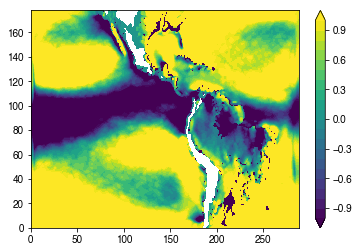

In [131]:
cf=mp.contourf(u_diff_hourly_means_list[0], levels=numpy.arange(-1,1.1,0.1), extend='both')
mp.colorbar(cf)

In [85]:
qvapor_diff_hourly_means_list = [numpy.nanmean(qvapor_diffs_lat_mean[skip_time:-1,:,:][hour_indices_list[HOUR]], axis=0) for HOUR in hours]

In [86]:
# ttest for differences in means
precip_diff_400_hourly_collect[0].shape
ttest_results = [scipy.stats.ttest_ind(precip_diff_400_hourly_collect[HOUR],precip_diff_1000_hourly_collect[HOUR],axis=0,equal_var=False)[1] for HOUR in hours]

/Users/baird/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:3833: RuntimeWarning: invalid value encountered in absolute
  prob = distributions.t.sf(np.abs(t), df) * 2  # use np.abs to get upper tail
/Users/baird/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/baird/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/baird/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater


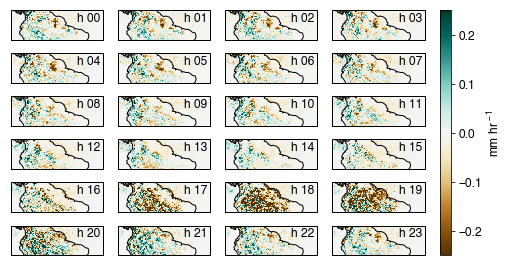

In [155]:
#levels = numpy.arange(-0.25,0.251,0.05)
#levels = numpy.arange(-1,1.1,0.2)
fontsize = 12

nrows=6
ncols=4
fig, axes = mp.subplots(ncols=ncols,nrows=nrows,subplot_kw={'projection': cartopy.crs.PlateCarree()})
fig.set_size_inches(6.5,3.75)
h=0

quiver_plot_list = []

every_nth_lat=20
every_nth_lon=20
quiver_scale = 0.15 # 
quiver_shaft_width = 0.75#.75
quiver_key_scale = 2
quiver_color = 'firebrick'
#quiver_head_length = 3
#quiver_head_axis_length = quiver_head_length

for i in range(nrows):
    for j in range(ncols):
        
        ttest_masked_precip_diff = numpy.copy(precip_diff_hourly_means_list[h])
        ttest_masked_precip_diff[ttest_results[h]>0.1] = numpy.nan
        
        #axes[i,j].text(s='hour '+'{:02}'.format(h), x=0, y=1.02, ha='left', va='bottom', transform=axes[i,j].transAxes, fontsize=fontsize)
        axes[i,j].set_extent([xlong.min()+67.5, xlong.max(), -10, 10], crs=cartopy.crs.PlateCarree())
        
        axes[i,j].text(s='h '+'{:02}'.format(h), x=0.97, y=0.93, ha='right', va='top', transform=axes[i,j].transAxes, fontsize=fontsize)

        pcolormesh_plot = axes[i,j].pcolormesh(xlong,xlat,precip_diff_hourly_means_list[h],vmin=-0.25,vmax=0.25,cmap='BrBG')
        
        axes[i,j].coastlines(resolution='110m')

#         quiver_plot = axes[i,j].quiver(xlong[::every_nth_lat,::every_nth_lon], \
#                         xlat[::every_nth_lat,::every_nth_lon], \
#                         u_diff_hourly_means_list[h][::every_nth_lat,::every_nth_lon], \
#                         v_diff_hourly_means_list[h][::every_nth_lat,::every_nth_lon], \
#                         units='xy', scale=quiver_scale, width=quiver_shaft_width, \
#                         facecolor=quiver_color, \
#                         zorder=2, edgecolors=['orange'], alpha=0.5)
        
#         quiver_plot_list.append(quiver_plot)
        h+=1
fig.tight_layout(w_pad=-1.75, h_pad=1)

top_pos = axes[0,ncols-1].get_position()
bottom_pos = axes[nrows-1,ncols-1].get_position()
cbar_axes = fig.add_axes([bottom_pos.x1+0.005, bottom_pos.y0, 0.025, top_pos.y1-bottom_pos.y0])
cbar = mp.colorbar(pcolormesh_plot, orientation='vertical', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_label('mm hr$^{\,-1}$', fontsize=fontsize)

# quiver_key = axes[0,3].quiverkey(quiver_plot_list[3], X=1.0, Y=1.25, labelpos='E', label='', \
#                                   U=quiver_key_scale, coordinates='axes')
# quiver_key_text = axes[0,3].text(s=str(quiver_key_scale)+' m s$^{\,-1}$', x=0.94, y=1.1, \
#                                   transform=axes[0,3].transAxes, fontsize=fontsize, ha='right', va='bottom')

fig.savefig('figure4_FMAASO_hourly_snapshots_precip_diffs.png', dpi=600, bbox_inches='tight', transparent=True)

# plot all QVAPOR info

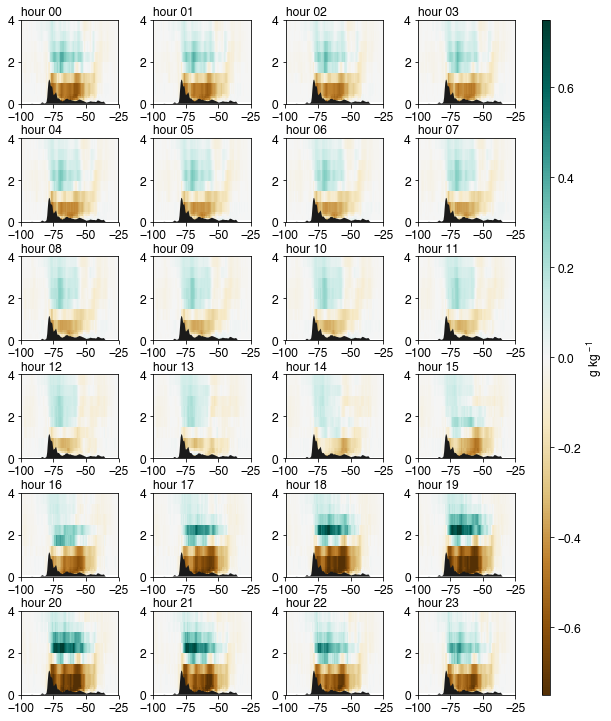

In [280]:
#levels = numpy.arange(-0.25,0.251,0.05)
#levels = numpy.arange(-1,1.1,0.2)
fontsize = 12

nrows=6
ncols=4
fig, axes = mp.subplots(ncols=ncols,nrows=nrows)
fig.set_size_inches(7.5,10)
h=0
for i in range(nrows):
    for j in range(ncols):
        
        axes[i,j].text(s='hour '+'{:02}'.format(h), x=0, y=1.02, ha='left', va='bottom', transform=axes[i,j].transAxes, fontsize=fontsize)
        axes[i,j].set_xlim(xlong.min()+55., xlong.max())
        axes[i,j].set_ylim(0,4)
        pcolormesh_plot = axes[i,j].pcolormesh(xlong[0,:],z,qvapor_diff_hourly_means_list[h]*1000.,vmin=-.75,vmax=0.75,cmap='BrBG')
        h+=1
        axes[i,j].tick_params(labelsize=fontsize)
        
        axes[i,j].fill_between(xlong[0,:], y_zero, HGT_M_lat_subset_mean/1000., facecolor='0.1', interpolate=True)
fig.tight_layout()

top_pos = axes[0,ncols-1].get_position()
bottom_pos = axes[nrows-1,ncols-1].get_position()
cbar_axes = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0, 0.015, top_pos.y1-bottom_pos.y0])
# cbar = mp.colorbar(contour_plot, orientation='vertical', cax=cbar_axes)
cbar = mp.colorbar(pcolormesh_plot, orientation='vertical', cax=cbar_axes)
#cbar.set_label(label=degree_sign+'C', fontsize=fontsize)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_label('g kg$^{\,-1}$', fontsize=fontsize)
#cbar.set_ticks(numpy.arange(-0.2,0.21,0.1))

fig.savefig('FMAASO_hourly_snapshots_qvapor_diffs.png', dpi=600, bbox_inches='tight', transparent=True)